In [112]:
#import libraries
import pandas_datareader.data as web
import datetime
import scipy as sp
import scipy.signal as sig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [43]:
""" Problem 3 """

' Problem 3 '

In [44]:
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader 
gdp = web.DataReader("GDPC1", "fred", start, end) 
consum = web.DataReader("PCECC96", "fred", start, end)
invest = web.DataReader("GPDIC1", "fred", start, end)
deflate = web.DataReader("GDPDEF", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
gdp = gdp.resample('3M').mean()
consum = consum.resample('3M').mean()
invest = invest.resample('3M').mean()
deflate = deflate.resample('3M').mean()

# take the natural log of the series and convert to numpy array
loggdp = np.log(gdp.values)
logconsum = np.log(consum.values)
loginvest = np.log(invest.values)
logdeflate = np.log(deflate.values)

In [108]:
len(logconsum)

229

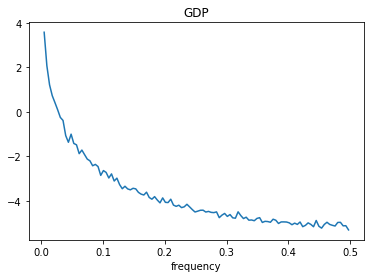

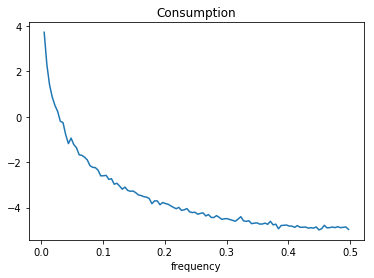

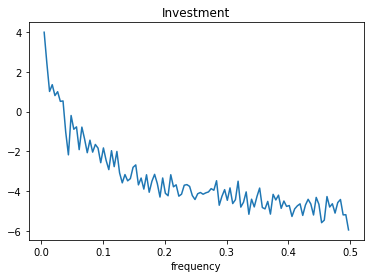

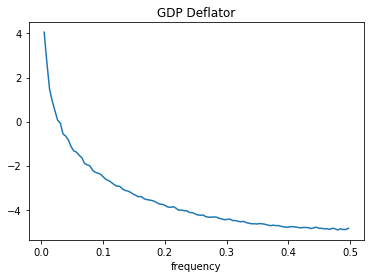

In [45]:
gdpfreq, gdpper = sig.periodogram(loggdp, axis=0)
plt.plot(gdpfreq[1:], np.log(gdpper[1:]))
plt.title('GDP')
plt.xlabel('frequency')
plt.show()

consumfreq, consumper = sig.periodogram(logconsum, axis=0)
plt.plot(consumfreq[1:], np.log(consumper[1:]))
plt.title('Consumption')
plt.xlabel('frequency')
plt.show()

investfreq, investper = sig.periodogram(loginvest, axis=0)
plt.plot(investfreq[1:], np.log(investper[1:]))
plt.title('Investment')
plt.xlabel('frequency')
plt.show()

deflatefreq, deflateper = sig.periodogram(logdeflate, axis=0)
plt.plot(deflatefreq[1:], np.log(deflateper[1:]))
plt.title('GDP Deflator')
plt.xlabel('frequency')
plt.show()

In [46]:
""" Problem 4 """

' Problem 4 '

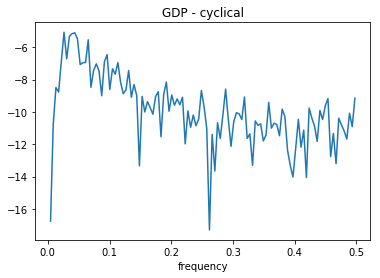

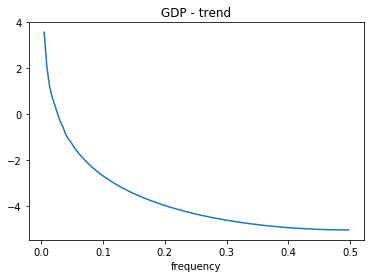

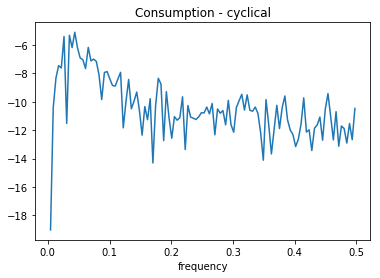

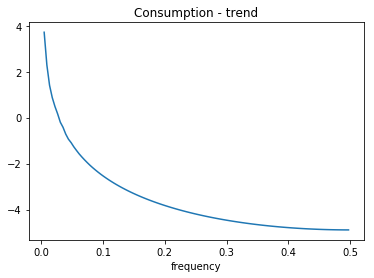

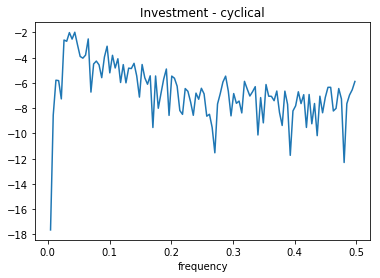

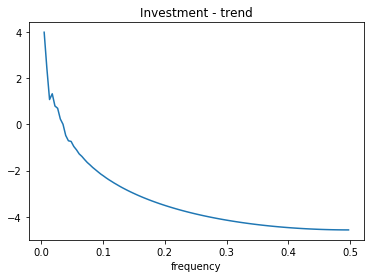

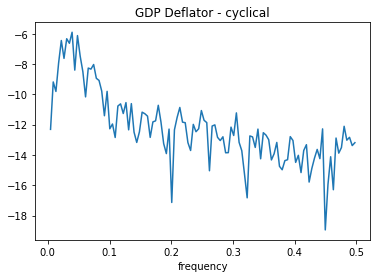

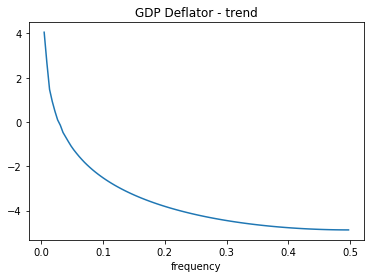

In [47]:
# Filter the data with HP

gdpcy, gdptr = sm.tsa.filters.hpfilter(loggdp, 1600)
consumcy, consumtr = sm.tsa.filters.hpfilter(logconsum, 1600)
investcy, investtr = sm.tsa.filters.hpfilter(loginvest, 1600)
deflatecy, deflatetr = sm.tsa.filters.hpfilter(logdeflate, 1600)

#GDP
gdpfreq, gdpcyper = sig.periodogram(gdpcy, axis=0)
plt.plot(gdpfreq[1:], np.log(gdpcyper[1:]))
plt.title('GDP - cyclical')
plt.xlabel('frequency')
plt.show()

gdpfreq, gdptrper = sig.periodogram(gdptr, axis=0)
plt.plot(gdpfreq[1:], np.log(gdptrper[1:]))
plt.title('GDP - trend')
plt.xlabel('frequency')
plt.show()

#consumption
consumfreq, consumcyper = sig.periodogram(consumcy, axis=0)
plt.plot(consumfreq[1:], np.log(consumcyper[1:]))
plt.title('Consumption - cyclical')
plt.xlabel('frequency')
plt.show()

consumfreq, consumtrper = sig.periodogram(consumtr, axis=0)
plt.plot(consumfreq[1:], np.log(consumtrper[1:]))
plt.title('Consumption - trend')
plt.xlabel('frequency')
plt.show()

#investment
investfreq, investcyper = sig.periodogram(investcy, axis=0)
plt.plot(investfreq[1:], np.log(investcyper[1:]))
plt.title('Investment - cyclical')
plt.xlabel('frequency')
plt.show()

investfreq, investtrper = sig.periodogram(investtr, axis=0)
plt.plot(investfreq[1:], np.log(investtrper[1:]))
plt.title('Investment - trend')
plt.xlabel('frequency')
plt.show()

#deflator
deflatefreq, deflatecyper = sig.periodogram(deflatecy, axis=0)
plt.plot(deflatefreq[1:], np.log(deflatecyper[1:]))
plt.title('GDP Deflator - cyclical')
plt.xlabel('frequency')
plt.show()

deflatefreq, deflatetrper = sig.periodogram(deflatetr, axis=0)
plt.plot(deflatefreq[1:], np.log(deflatetrper[1:]))
plt.title('GDP Deflator - trend')
plt.xlabel('frequency')
plt.show()

In [48]:
""" Problem 5 """

' Problem 5 '

In [49]:
def get_data(l, s, start, end):
    # download data from FRED using pandas datareader 
    data = web.DataReader(s, "fred", start, end) 
    # convert to quarterly frequencies by averaging over the three months in the quarter
    data = data.resample('3M').mean()
    # take the natural log of the series and convert to numpy array
    logdata = np.log(data.values)
    # Filter the data with HP
    datacy, datatr = sm.tsa.filters.hpfilter(logdata, l)
    return datacy, datatr

def get_calc(l, s, start, end):
    
    #data
    datacy, datatr = get_data(l,s,start,end)

    #std
    std = datacy.std()
    print("Standard Deviation:", std)
    
    #autocor
    autocor = np.corrcoef(datacy[:-1],datacy[1:])[1][0]
    print("Autocorrelation:", autocor)
    
    #gdp corr
    gdpcy, gdptr = get_data(l, "GDPC1", start, end)
    corr = np.corrcoef(datacy, gdpcy)[0][1]
    print("GDP Correlation:", corr)

In [50]:
lambdas = [100, 400, 1600, 6400, 25600]
series = ["GDPC1","PCECC96","GPDIC1","GDPDEF"]
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)
for l in lambdas:
    print("Lambda = ", l)
    for s in series:
        print("Series = ", s)
        get_calc(l, s, start, end)
        print("\n")

Lambda =  100
Series =  GDPC1
Standard Deviation: 0.00859381844873
Autocorrelation: 0.687960106218
GDP Correlation: 1.0


Series =  PCECC96
Standard Deviation: 0.00658567555868
Autocorrelation: 0.680324514003
GDP Correlation: 0.782678600607


Series =  GPDIC1
Standard Deviation: 0.0414523078246
Autocorrelation: 0.634619379215
GDP Correlation: 0.89228371474


Series =  GDPDEF
Standard Deviation: 0.00328929606489
Autocorrelation: 0.806045221364
GDP Correlation: -0.300793364298


Lambda =  400
Series =  GDPC1
Standard Deviation: 0.0114989916571
Autocorrelation: 0.801978773687
GDP Correlation: 1.0


Series =  PCECC96
Standard Deviation: 0.00916280995392
Autocorrelation: 0.810914219231
GDP Correlation: 0.84288159808


Series =  GPDIC1
Standard Deviation: 0.0534548471815
Autocorrelation: 0.758071290393
GDP Correlation: 0.912466962124


Series =  GDPDEF
Standard Deviation: 0.0052608270853
Autocorrelation: 0.90043825029
GDP Correlation: -0.418053001241


Lambda =  1600
Series =  GDPC1
Standard

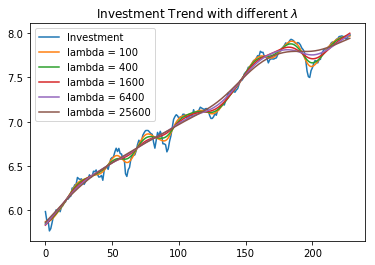

In [53]:
data = web.DataReader("GPDIC1", "fred", start, end) 
data = data.resample('3M').mean()
logdata = np.log(data.values)
x = np.arange(len(logdata))
plt.plot(x, logdata, label = "Investment")
for lamb in lambdas:
    datacy, datatr = sm.tsa.filters.hpfilter(logdata, lamb)
    plt.plot(x, datatr, label = "lambda = " +str(lamb))
plt.title("Investment Trend with different $\lambda$")
plt.legend()
plt.show()

In [52]:
""" Problem 6 """

' Problem 6 '

In [185]:
#Data
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

GDP = web.DataReader("GDPC1", "fred", start, end) 
GDP = GDP.resample('3M').mean()
logGDP = np.log(GDP.values)

CON = web.DataReader("PCECC96", "fred", start, end)
CON = CON.resample('3M').mean()
logCON = np.log(CON.values)

INV = web.DataReader("GPDIC1", "fred", start, end)
INV = INV.resample('3M').mean()
logINV = np.log(INV.values)

DEF = web.DataReader("GDPDEF", "fred", start, end) 
DEF = DEF.resample('3M').mean()
logDEF = np.log(DEF.values)

CPI = web.DataReader("CPIAUCSL", "fred", start, end)
CPI = CPI.resample('3M').mean()
logCPI = np.log(CPI.values)

GOV = web.DataReader("W068RCQ027SBEA", "fred", start, end) 
GOV = GOV.resample('3M').mean()
logGOV = np.log(GOV.values)

NET = web.DataReader("NETEXP", "fred", start, end) 
NET = NET.resample('3M').mean()
logNET = NET.values/GDP.values

EXP = web.DataReader("EXPGSC1", "fred", start, end) 
EXP = EXP.resample('3M').mean()
logEXP = np.log(EXP.values)


IMP = web.DataReader("B021RX1Q020SBEA", "fred", start, end) 
IMP = IMP.resample('3M').mean()
logIMP = np.log(IMP.values)

EMP = web.DataReader("LREM25TTUSQ156N", "fred", start, end)
EMP = EMP.resample('3M').mean()
logEMP = np.log(EMP.values)

HRS = web.DataReader("HOHWMN02USQ065S", "fred", start, end) 
HRS = HRS.resample('3M').mean()
logHRS = np.log(HRS.values)

LAB = web.DataReader("CLF16OV", "fred", start, end) 
LAB = LAB.resample('3M').mean()
logLAB = np.log(LAB.values)

NOMW = web.DataReader("A576RC1", "fred", start, end)
NOMW = NOMW.resample('3M').mean()
logNOMW = np.log(NOMW.values)

REALW = NOMW.values / CPI.values
logREALW = np.log(REALW)

NOMI = web.DataReader("FEDFUNDS", "fred", start, end)
NOMI = NOMI.resample('3M').mean()
logNOMI = np.log(NOMI.values)

REALI = NOMI.values / CPI.values
logREALI = np.log(REALI)

MS = web.DataReader("M2SL", "fred", start, end)
MS = MS.resample('3M').mean()
logMS = np.log(MS.values)

RMS = MS.values / CPI.values
logRMS = np.log(RMS)

logPROD = logGDP - logLAB + logHRS

UNEMP = web.DataReader("UNRATE", "fred", start, end) 
UNEMP = UNEMP.resample('3M').mean()
logUNEMP = np.log(UNEMP.values)

PART = web.DataReader("CIVPART", "fred", start, end) 
PART  = PART.resample('3M').mean()
logPART = np.log(PART.values)


In [186]:
index = ["Real GDP", "Consumption", "Investment", "Government Spending", "Net Exports", "Exports", "Imports",\
         "Employment", "Hours", "Total Labor", "Nominal Wages", "Real Wages", "Nominal Interest Rate",\
         "Real Interest Rate", "Money Supply", "Real Money Supply", "GDP Deflator", "CPI - All", \
         "Labor Productivity", "Unemployment Rate", "Participation Rate"]

arrays = [['Volatility', 'Volatility', 'Persistence', 'Cyclicality'],
       ['Standard Deviation', 'Relative to GDP', 'Auto-Correlation', 'Correlation with GDP']]

data = [logGDP, logCON, logINV, logGOV, logNET, logEXP, logIMP, logEMP, logHRS, logLAB, logNOMW,\
        logREALW, logNOMI, logREALI, logMS, logRMS, logDEF, logCPI, logPROD, logUNEMP, logPART]

def get_table():
    tuples = list(zip(*arrays))
    columns = pd.MultiIndex.from_tuples(tuples)
    table = pd.DataFrame(index=index, columns=columns)
    return table

In [200]:
def get_vals(table, f, j):
    
    #get GDP data
    gdpcy = f(logGDP)
    gdpstd = np.std(gdpcy)
    
    if j == 6:
        datacy = f(data[j])
        std = np.std(datacy)
        rel = std / gdpstd
        aut = np.corrcoef(datacy[:-1], datacy[1:])[0][1]
        cor = np.corrcoef(datacy, gdpcy[7:])[0][1]     
    else:
        datacy = f(data[j])
        std = np.std(datacy)
        rel = std / gdpstd
        aut = np.corrcoef(datacy[:-1], datacy[1:])[0][1]
        cor = np.corrcoef(datacy, gdpcy)[0][1]

    return std, rel, aut, cor

In [207]:
def hpfilter(x):
    return sm.tsa.filters.hpfilter(x, 1600)[0]

def firstdiff(x):
    return x[1:] - x[:-1]

def cpfilter(x):
    return sm.tsa.filters.bkfilter(x, 6, 32)

def lintrend(x):
    return sp.signal.detrend(x, type = "linear")


#displays too many tables all at once
#do one at a time
filtername = ["HP Filter"]#, "First Difference Filter", "CP Filter", "Liner Trend Filter"]
filters  = [hpfilter]#, firstdiff, cpfilter, lintrend]

for i in range(len(filters)):
    table = get_table()
    for j in range(len(index)):
        std, rel, aut, cor = get_vals(table, filters[i], j)
        table.loc[index[j], ("Volatility", "Standard Deviation")] = std
        table.loc[index[j], ("Volatility", "Relative to GDP")] = rel
        table.loc[index[j], ("Persistence", "Auto-Correlation")] = aut
        table.loc[index[j], ("Cyclicality", "Correlation with GDP")] = cor
    print(filtername[i])
    print(table)
    print("\n")

HP Filter
                              Volatility                      Persistence  \
                      Standard Deviation Relative to GDP Auto-Correlation   
Real GDP                       0.0146644               1         0.866109   
Consumption                    0.0119967        0.818084          0.87719   
Investment                     0.0661791         4.51292         0.830968   
Government Spending            0.0173955         1.18625         0.780324   
Net Exports                    0.0029228        0.199314         0.783347   
Exports                        0.0416175         2.83801         0.663761   
Imports                        0.0489386         3.33725         0.783957   
Employment                    0.00970766        0.661991         0.501678   
Hours                         0.00897377        0.611945         0.782777   
Total Labor                   0.00368449        0.251255         0.731488   
Nominal Wages                  0.0157901         1.07677         0